# Import Needed Packages

In [1]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, binary_accuracy

In [2]:

# Directory for Parasitized images
parasitic = os.listdir(r"C:\Users\Elwaly\Downloads\Malaria\cell_images\Uninfected")

# Directory for Uninfected images
uninfected = os.listdir(r"C:\Users\Elwaly\Downloads\Malaria\cell_images\Parasitized")

In [3]:
len(parasitic)  #total images of Parasitized images

13779

# DATA VISUALIZATION


## PARASITIZED IMAGES

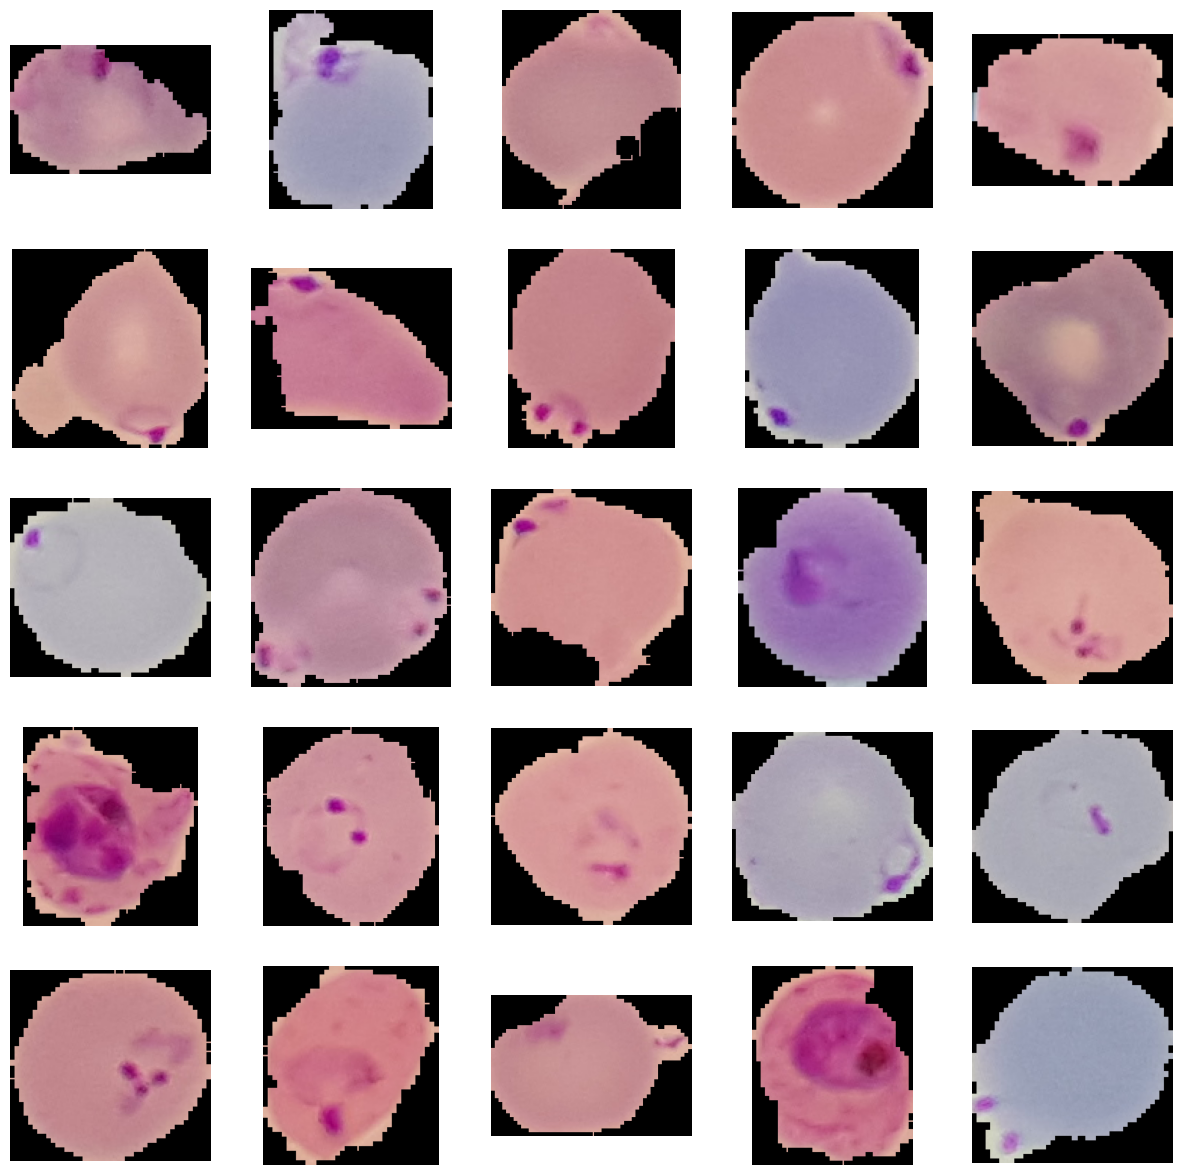

In [4]:
# Taking 25 random samples from the PARASITIZED folder
filenames = random.sample(os.listdir(r"C:\Users\Elwaly\Downloads\Malaria\cell_images\Parasitized"), 25)   

plt.figure(figsize=(15, 15)) 

# Displaying 25 samples
for i in range(1, len(filenames)+1):
    row = i
    image_path = os.path.join(r"C:\Users\Elwaly\Downloads\Malaria\cell_images\Parasitized", filenames[i-1])
    image = plt.imread(image_path)
    plt.subplot(5, 5, row)
    plt.axis("off")
    plt.imshow(image)

plt.show()


## UNINFECTED IMAGES

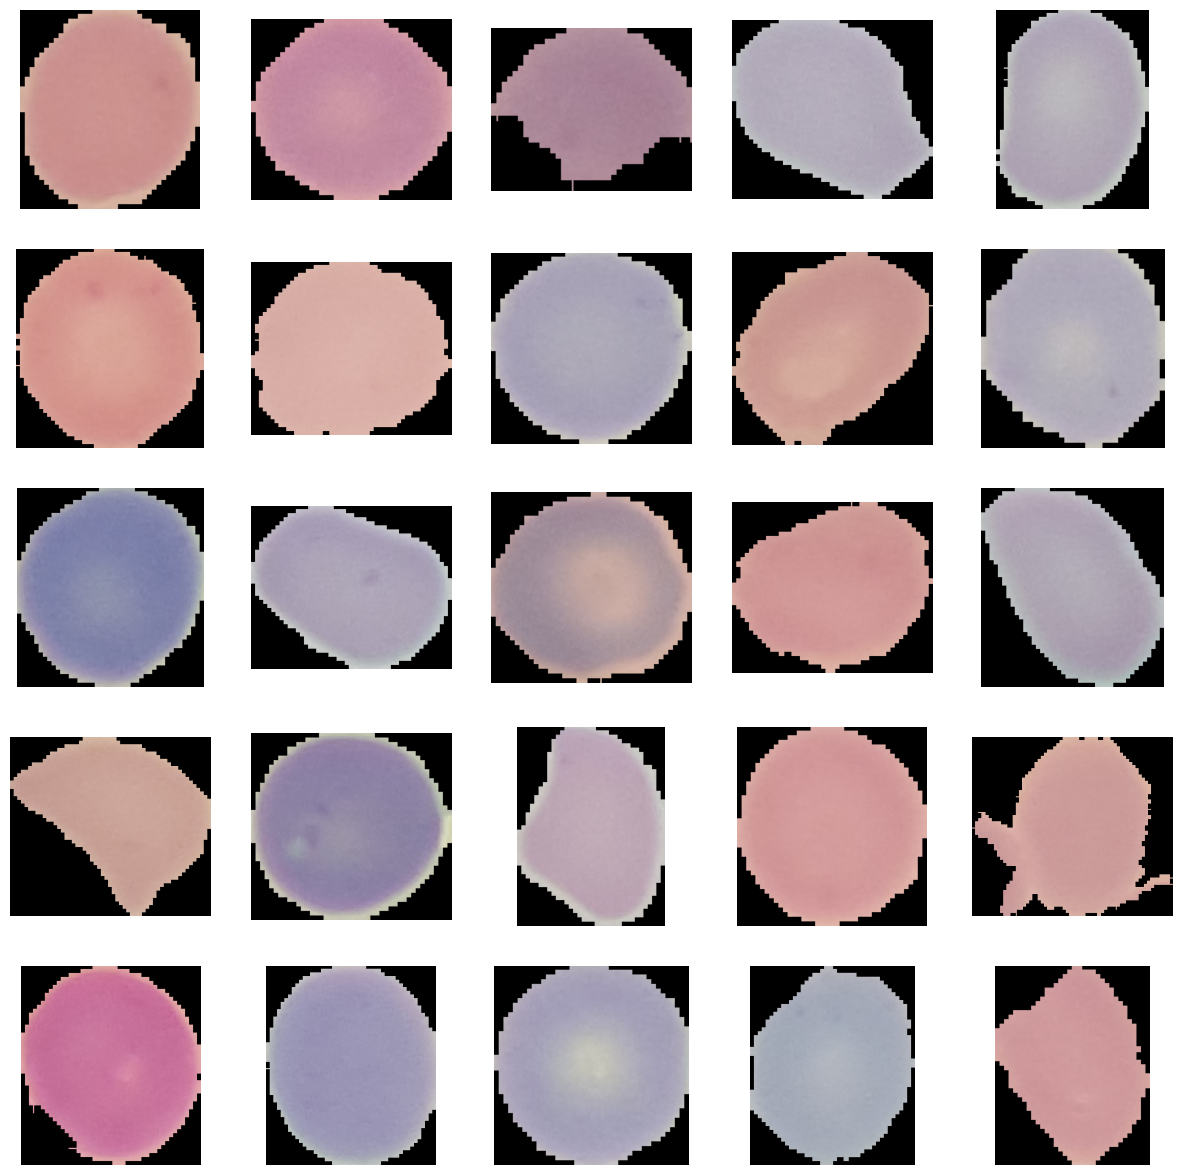

In [5]:
# Taking 25 random samples from the PARASITIZED folder
filenames = random.sample(os.listdir(r"C:\Users\Elwaly\Downloads\Malaria\cell_images\Uninfected"), 25)   

plt.figure(figsize=(15, 15)) 

# Displaying 25 samples
for i in range(1, len(filenames)+1):
    row = i
    image_path = os.path.join(r"C:\Users\Elwaly\Downloads\Malaria\cell_images\Uninfected", filenames[i-1])
    image = plt.imread(image_path)
    plt.subplot(5, 5, row)
    plt.axis("off")
    plt.imshow(image)

plt.show()

# DATA PREPROCESSING

## DATA AUGMENTATION
We are doing data augmentation and splitting the data in training and validation set.

Setting split equal to 20%
Shape of image is (64,64,3)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_path = r"C:\Users\Elwaly\Downloads\Malaria\train"

# Create an ImageDataGenerator with validation split
data_generator = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=0.4,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    validation_split=0.2
)

# Create a generator for the training set
train = data_generator.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    subset="training"  # Use the "training" subset for training data
)

# Create a generator for the original validation set
validation = data_generator.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    subset="validation"  # Use the "validation" subset for validation data
)

Found 17639 images belonging to 2 classes.
Found 4408 images belonging to 2 classes.


In [7]:
test_path = r"C:\Users\Elwaly\Downloads\Malaria\test"

test_generator = ImageDataGenerator()
test = test_generator.flow_from_directory(
    test_path,
    target_size=(64, 64),
    class_mode="binary",
    batch_size=32,
    shuffle=True,)

Found 5511 images belonging to 2 classes.


# BUILDING MODEL USING VGG16

## ABOUT VGG16
- VGG16 is a convolution neural net(CNN) architecture which was used to win ILSVR(Imagenet) competition in 2014.
- By default, it loads weights pre-trained on ImageNet.

In [8]:
model = VGG16( include_top=False, weights ="imagenet", input_shape=(64,64,3))  
model.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [9]:
#Printing the names of all the layers present in the model and setting trainable as False

for i in range(len(model.layers)):
  print(i,model.layers[i])
  model.layers[i].trainable=False

0 <keras.src.engine.input_layer.InputLayer object at 0x00000241F47831D0>
1 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000241F4476CD0>
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000241F5EE6490>
3 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000241F360F3D0>
4 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000241F602B690>
5 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000241F5960150>
6 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000241F6015650>
7 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000241F6005550>
8 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000241F76857D0>
9 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000241F7686F90>
10 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000241F6041590>
11 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000241F7135310>
12 <keras.src.layers.convolutional.conv2d.Conv

In [10]:
# Remove GlobalAveragePooling2D and replace with Flatten
l = Flatten()(model.output)
l3 = Dense(128, activation="relu")(l)
l5 = Dense(1, activation="sigmoid")(l3)

# Creating the new model by adding the VGG model's input as Input of the new model and l5 layer of our custom model as Output.
new_model = Model(inputs=model.input, outputs=l5)

In [11]:
# New Model
new_model.summary()    

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

# Compiling the new model

In [12]:
# Using Adam as the optimizer and loss as binary cross entropy as there are only 2 classes
metrics = [TruePositives(name='tp'),FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), 
            BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]

adam = Adam(learning_rate=0.0005)
new_model.compile(optimizer=adam,loss="binary_crossentropy",metrics=metrics)

# Training the new model

In [13]:
his = new_model.fit_generator(train,epochs=50,validation_data=validation)

C:\Users\Elwaly\AppData\Local\Temp\ipykernel_12988\355989197.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = new_model.fit_generator(train,epochs=50,validation_data=validation)


Epoch 1/50

552/552 [==============================] - 174s 308ms/step - loss: 0.4153 - tp: 7592.0000 - fp: 2082.0000 - tn: 6738.0000 - fn: 1227.0000 - accuracy: 0.8124 - precision: 0.7848 - recall: 0.8609 - auc: 0.8859 - val_loss: 0.3819 - val_tp: 2070.0000 - val_fp: 621.0000 - val_tn: 1583.0000 - val_fn: 134.0000 - val_accuracy: 0.8287 - val_precision: 0.7692 - val_recall: 0.9392 - val_auc: 0.9131
Epoch 2/50
552/552 [==============================] - 155s 281ms/step - loss: 0.3716 - tp: 7794.0000 - fp: 1878.0000 - tn: 6942.0000 - fn: 1025.0000 - accuracy: 0.8354 - precision: 0.8058 - recall: 0.8838 - auc: 0.9072 - val_loss: 0.3706 - val_tp: 2084.0000 - val_fp: 603.0000 - val_tn: 1601.0000 - val_fn: 120.0000 - val_accuracy: 0.8360 - val_precision: 0.7756 - val_recall: 0.9456 - val_auc: 0.9157
Epoch 3/50
552/552 [==============================] - 154s 279ms/step - loss: 0.3638 - tp: 7881.0000 - fp: 1859.0000 - tn: 6961.0000 - fn: 938.0000 - accuracy: 0.8414 - precision: 0.8091 - recall

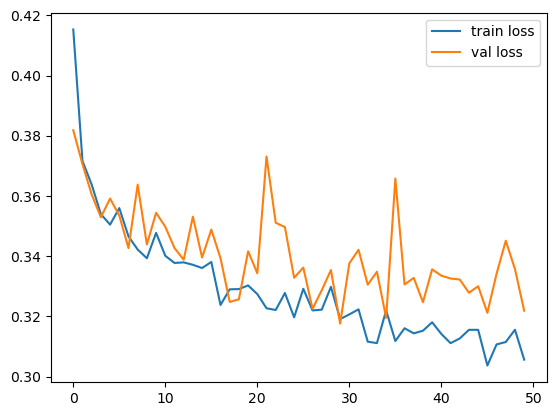

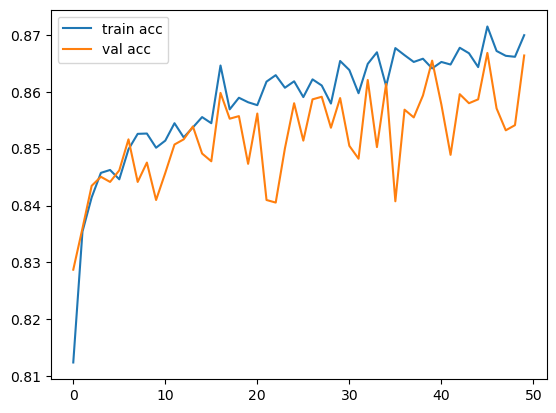

In [18]:
# plot the loss
plt.plot(his.history['loss'], label='train loss')
plt.plot(his.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('VGG_LossVal_loss')
plt.show()


# plot the accuracy
plt.plot(his.history['accuracy'], label='train acc')
plt.plot(his.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('VGG_AccVal_acc')
plt.show()


# Testing the model

In [15]:
# testing on train set
new_model.evaluate(train)  

552/552 [==============================] - 69s 125ms/step - loss: 0.3188 - tp: 8347.0000 - fp: 1895.0000 - tn: 6925.0000 - fn: 472.0000 - accuracy: 0.8658 - precision: 0.8150 - recall: 0.9465 - auc: 0.9342


[0.31878483295440674,
 8347.0,
 1895.0,
 6925.0,
 472.0,
 0.8658087253570557,
 0.8149775266647339,
 0.9464792013168335,
 0.9341771006584167]

In [16]:
#testing  on test set
print(new_model.evaluate(test))  

173/173 [==============================] - 19s 110ms/step - loss: 8.0377 - tp: 1978.0000 - fp: 128.0000 - tn: 2627.0000 - fn: 778.0000 - accuracy: 0.8356 - precision: 0.9392 - recall: 0.7177 - auc: 0.8492
[8.03767204284668, 1978.0, 128.0, 2627.0, 778.0, 0.8356015086174011, 0.9392212629318237, 0.7177067995071411, 0.849173903465271]


# Saving the model

In [89]:
# save it as a h5 file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
new_model.save('model_vgg16.h5')

In [91]:
model=load_model('model_vgg16.h5')

In [117]:
img=image.load_img(r"C:\Users\Elwaly\Downloads\Malaria\cell_images\Uninfected\C184P145ThinF_IMG_20151203_104153_cell_96.png", target_size=(64,64,3))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
model.predict(x)

1/1 [==============================] - 0s 33ms/step


array([[1.]], dtype=float32)

In [128]:
for i in model.predict(x):
    if(int(i)==1):
        print("Uninfected")
    else:
        print("Infected")

1/1 [==============================] - 0s 38ms/step
Uninfected
